In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

fs_{UCL} = $6.44_{-3.45}^{+7.45}$
fs_{Psc-Eri} = $3.17_{-1.70}^{+3.69}$
fs_{Praesepe} = $2.79_{-1.62}^{+3.88}$
fs_{NGC 6811} = $0.91_{-0.58}^{+1.61}$
fs_{M67} = $0.75_{-0.48}^{+1.34}$


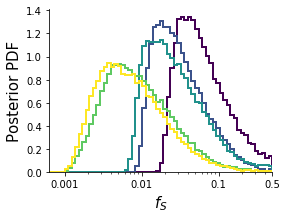

In [6]:
samples_ucl = np.load('data/ucl_samples.npy')
samples_psceri = np.load('data/psceri_samples.npy')
samples_praesepe = np.load('../../zeitsprung/data/abc_samples_slow.npy')
samples_ngc6811 = np.load('data/ngc6811_samples.npy')
samples_m67 = np.load('data/m67_samples.npy')

bins = 70
bin_range = [-3.5, np.log10(0.5)]#[0.001, 0.1]
fig, ax = plt.subplots(figsize=(4, 3))

cmap = lambda x: plt.cm.viridis(x/4)


def plot_fs_posterior(samples_fast, label, color):
    fs_fast = np.pi * 3 * samples_fast[:, 1]**2 / (4*np.pi)

    ax.hist(np.log10(fs_fast), color=color, bins=bins, alpha=1, density=True, range=bin_range, 
            label=label, histtype='step', lw=2);

    mu_fast, std_fast =  np.log10(fs_fast).mean(), np.log10(fs_fast).std()

    mid_fast, lower_fast, upper_fast = 100 * 10**(mu_fast), 100 * 10**(mu_fast-std_fast), 100 * 10**(mu_fast+std_fast)

    print('fs_{{{3}}} = ${0:.2f}_{{-{1:.2f}}}^{{+{2:.2f}}}$'.format(mid_fast, mid_fast-lower_fast, upper_fast-mid_fast, label))


plot_fs_posterior(samples_ucl, 'UCL', color=cmap(0))
plot_fs_posterior(samples_psceri, 'Psc-Eri', color=cmap(1))
plot_fs_posterior(samples_praesepe, 'Praesepe', color=cmap(2))
plot_fs_posterior(samples_ngc6811, 'NGC 6811', color=cmap(3))
plot_fs_posterior(samples_m67, 'M67', color=cmap(4))

for s in ['right', 'top']: 
    ax.spines[s].set_visible(False)
fs = 15
ax.set_xlabel('$f_S$', fontsize=fs)

ax.set_ylabel('Posterior PDF', fontsize=fs)
ax.set_xticks([-3, -2, -1, np.log10(0.5)])
ax.set_xticks(#np.log10(np.arange(0.0001, 0.001, 0.0001)).tolist() + 
              np.log10(np.arange(0.001, 0.01, 0.001)).tolist() + 
              np.log10(np.arange(0.01, 0.1, 0.01)).tolist() + 
              np.log10(np.arange(0.1, 0.5, 0.1)).tolist(), minor=True)
# ax.grid(False, which='minor')
ax.set_xticklabels(['0.001', '0.01', '0.1', '0.5'])
ax.set_xlim([-3.2, np.log10(0.5)])
# plt.legend(loc=())
plt.savefig('plots/fs_posterior.pdf', bbox_inches='tight')

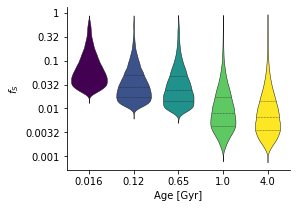

In [7]:
import seaborn

ages = np.concatenate([0.016 * np.ones(len(samples_ucl)),                       
                       0.12 * np.ones(len(samples_psceri)),
                       0.65 * np.ones(len(samples_praesepe)), 
                       1.0  * np.ones(len(samples_ngc6811)), 
                       4 * np.ones(len(samples_m67))])

fs_series = np.concatenate([np.pi * 3 * samples_ucl[:, 1]**2 / (4*np.pi), 
                            np.pi * 3 * samples_psceri[:, 1]**2 / (4*np.pi), 
                            np.pi * 3 * samples_praesepe[:, 1]**2 / (4*np.pi), 
                            np.pi * 3 * samples_ngc6811[:, 1]**2 / (4*np.pi), 
                            np.pi * 3 * samples_m67[:, 1]**2 / (4*np.pi)])

palette = {0.016: cmap(0), 
           0.12: cmap(1),
           0.65: cmap(2), 
           1.0: cmap(3), 
           4.0: cmap(4)}
    
plt.figure(figsize=(4,3))
seaborn.violinplot(ages, np.log10(fs_series), palette=palette, linewidth=0.5, 
                   inner='quartiles', scale='area', saturation=1)

ax = plt.gca()

yticks = ax.get_yticks()

ax.set_yticklabels(["{0:.2g}".format(10**yt) for yt in yticks])
ax.set_ylabel('$f_S$')
plt.xlabel('Age [Gyr]')

for s in ['right', 'top']: 
    ax.spines[s].set_visible(False)
    
plt.savefig('plots/fs_violin.pdf', bbox_inches='tight')

[-0.37669978 -1.90426684] [0.20365693 0.21259923]


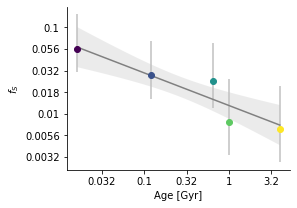

In [8]:

import scipy.special as sp

plt.figure(figsize=(4,3))

ages = np.array([0.016, 0.12, 0.65, 1.0, 4])

fs_series = np.vstack([np.pi * 3 * samples_ucl[:, 1]**2 / (4*np.pi), 
                        np.pi * 3 * samples_psceri[:, 1]**2 / (4*np.pi), 
                        np.pi * 3 * samples_praesepe[:, 1]**2 / (4*np.pi), 
                        np.pi * 3 * samples_ngc6811[:, 1]**2 / (4*np.pi), 
                        np.pi * 3 * samples_m67[:, 1]**2 / (4*np.pi)])

colors = [cmap(0), cmap(1), cmap(2), cmap(3), cmap(4)]
meds = []
yerr = []
for a, fs, color in zip(ages, fs_series, colors): 
    lo, med, hi = np.nanpercentile(np.log10(fs), [16, 50, 84])
    meds.append(med)
    yerr.append(np.mean([med-lo, hi-med]))
    plt.errorbar(np.log10(a), med, [[med-lo], [hi-med]], fmt='o', ecolor='silver', color=color)
meds = np.array(meds)
yerr = np.array(yerr)
    
# seaborn.regplot(np.log10(ages), meds, color='gray', scatter=False, order=1, )

X = np.vander(np.log10(ages), 2)
Omega_0 = np.diag(yerr**2)
inv_Omega_0 = np.linalg.inv(Omega_0)
c0 = np.linalg.inv(X.T @ inv_Omega_0 @ X) @ X.T @ inv_Omega_0 @ np.array(meds)
c0err = np.diag(np.linalg.inv(X.T @ inv_Omega_0 @ X))**0.5
print(c0, c0err)

# https://stackoverflow.com/questions/25994048/confidence-regions-of-1sigma-for-a-2d-plot
## These multipliers are used in constructing the intervals.
## Get the coefficient estimates.
X_fine = np.vander(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), 2)
Yhat = X_fine @ c0
n = len(X_fine)#len(meds)
Y = meds
U, s, vt = np.linalg.svd(X_fine, False)

s = 2*np.mean(yerr) 

## These multipliers are used in constructing the intervals.
XtX = np.dot(np.transpose(X_fine), X_fine)
V = [np.dot(X_fine[i,:], np.linalg.solve(XtX, X_fine[i,:])) for i in range(n)]
V = np.array(V)

## The F quantile used in constructing the Scheffe interval.
QF = sp.fdtri(X.shape[1], n-X.shape[1], 0.95)
QF_2 = sp.fdtri(X.shape[1], n-X.shape[1], 0.68)

## The lower and upper bounds of the Scheffe band.
D = s * np.sqrt(X.shape[1] * QF * V)
# LB, UB = Yhat-D, Yhat+D
D_2 = s*np.sqrt(X.shape[1] * QF_2 * V)
LB_2, UB_2 = Yhat-D_2, Yhat+D_2

plt.plot(np.log10(ages), X @ c0, color='gray')
plt.fill_between(X_fine[:, 0], LB_2, UB_2, 
                 where=(UB_2 >= LB_2), facecolor='silver', alpha=0.3)
ax = plt.gca()

xticks = ax.get_xticks()
ax.set_xticklabels(["{0:.2g}".format(10**xt) for xt in xticks])
ax.set_xlabel('Age [Gyr]')

yticks = ax.get_yticks()
ax.set_yticklabels(["{0:.2g}".format(10**yt) for yt in yticks])
ax.set_ylabel('$f_S$')
plt.xlabel('Age [Gyr]')


for s in ['right', 'top']: 
    ax.spines[s].set_visible(False)
    
plt.savefig('plots/fs_trend.pdf', bbox_inches='tight')

In [9]:
a, a_upper, a_lower = 10**c0[1], 10**(c0[1] + c0err[1]), 10**(c0[1] - c0err[1])

print("{{{0:.3f}}}^{{+{1:.3f}}}_{{-{2:.3f}}}".format(a, a_upper, a_lower))

{0.012}^{+0.020}_{-0.008}


In [10]:
a * 4.6 ** -0.33

0.007533956006158755